# Question 2
***
__Group No. 52__
- CS23MTECH14019 - Yug Patel
- CS23MTECH11026 - Bhargav Patel

In [68]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.io import loadmat
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from scipy.stats import mode
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import accuracy_score

In [2]:
# Load the .mat file
svhn_data = loadmat('train_32x32.mat')
# Access the images and labels
X_train = svhn_data['X']
y_train = svhn_data['y']

### Creating subset of dataset (2500 samples per label)

In [3]:
# Randomly choose 2500 samples from each class
num_samples_per_class = 2500
selected_indices = np.concatenate([np.where(y_train == i)[0][:num_samples_per_class] for i in range(1, 11)])
X_subset = X_train[:,:,:,selected_indices]
X_subset.shape

y_subset_indices = np.concatenate([np.where(y_train[selected_indices] == i)[0][:num_samples_per_class] for i in range(1, 11)])
y_subset = y_train[selected_indices][y_subset_indices]

X_train_transpose = X_subset.transpose(3,0,1,2)
X_train_flat=X_train_transpose.reshape(X_subset.shape[3],-1)
X_train_flat.shape

(25000, 3072)

## Question 2(a)
Performing k means clustering on 
1. Raw dataset
2. Dataset obtained by PCA with dimension 27 
3. Dataset obtained by PCA with dimension 10

In [4]:
# Perform PCA for dimension 27 as in question 1 (a)
pca_dim_a = 27
pca_a = PCA(n_components=pca_dim_a)
X_train_pca_a = pca_a.fit_transform(X_train_flat)

# Perform PCA for dimension 10 as in question 1 (b)
pca_dim_b = 10
pca_b = PCA(n_components=pca_dim_b)
X_train_pca_b = pca_b.fit_transform(X_train_flat)

# Perform k-means clustering on raw data
kmeans_raw = KMeans(n_clusters=10, n_init=10)
kmeans_raw.fit(X_train_flat)

# Perform k-means clustering after PCA for dimension found in question 1 (a)
kmeans_pca_a = KMeans(n_clusters=10, n_init=10)
kmeans_pca_a.fit(X_train_pca_a)

# Perform k-means clustering after PCA for dimension 10 as in question 1 (b)
kmeans_pca_b = KMeans(n_clusters=10, n_init=10)
kmeans_pca_b.fit(X_train_pca_b)

KMeans(n_clusters=10, n_init=10)

### __Getting images which are closer to the centroid of each cluster for all three cases of dataset respectively__

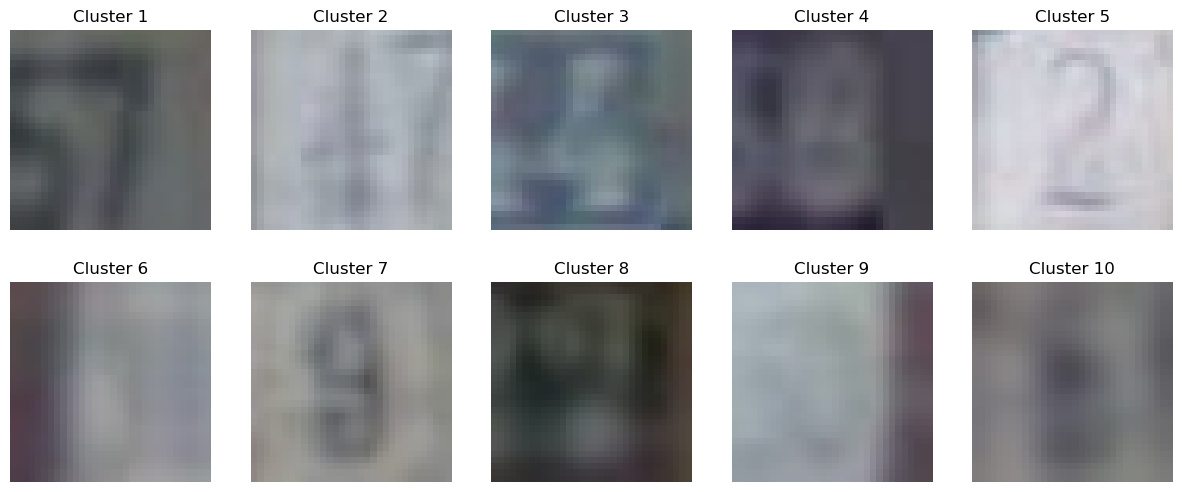

In [5]:
centroids_raw = kmeans_raw.cluster_centers_
closest_images_raw_idx, _ = pairwise_distances_argmin_min(centroids_raw, X_train_flat)
plt.figure(figsize=(15, 6))
for i, idx in enumerate(closest_images_raw_idx):
    plt.subplot(2, 5, i + 1)
    
    # Reshape the flattened image back to its original shape
    closest_image = X_train_transpose[idx]
        
    plt.imshow(closest_image)
    
    plt.title(f'Cluster {i+1}')
    plt.axis('off')

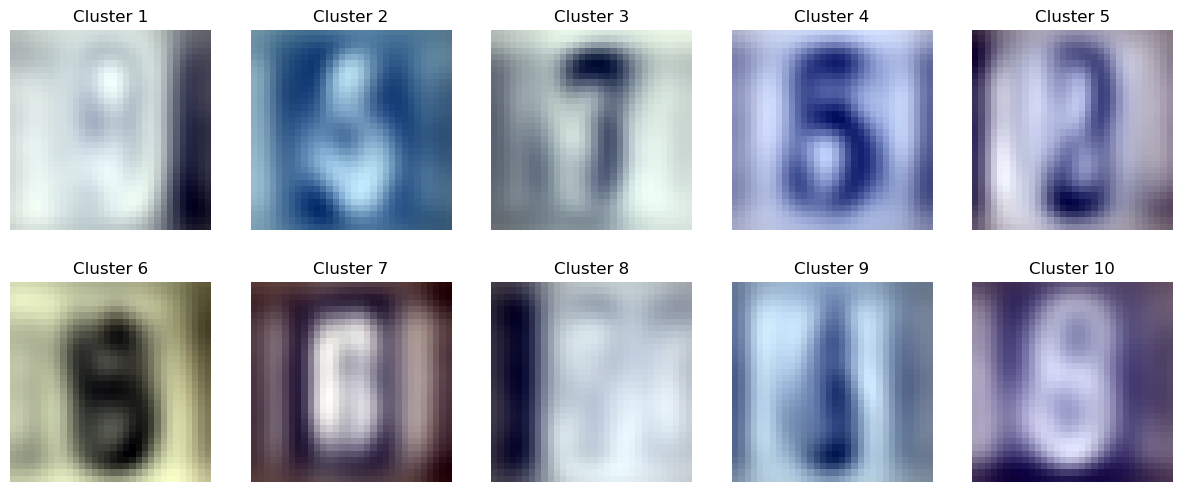

In [6]:
centroids_pca_a = kmeans_pca_a.cluster_centers_
closest_images_pca_a_idx, _ = pairwise_distances_argmin_min(centroids_pca_a, X_train_pca_a)
plt.figure(figsize=(15, 6))
for i, idx in enumerate(closest_images_pca_a_idx):
    plt.subplot(2, 5, i + 1)
    
    # Reshape the flattened image back to its original shape
    closest_image = pca_a.inverse_transform(X_train_pca_a[idx])
    closest_image = (closest_image-min(closest_image))/(max(closest_image)-min(closest_image))
    plt.imshow(closest_image.reshape(32,32,-1))
    plt.title(f'Cluster {i+1}')
    plt.axis('off')

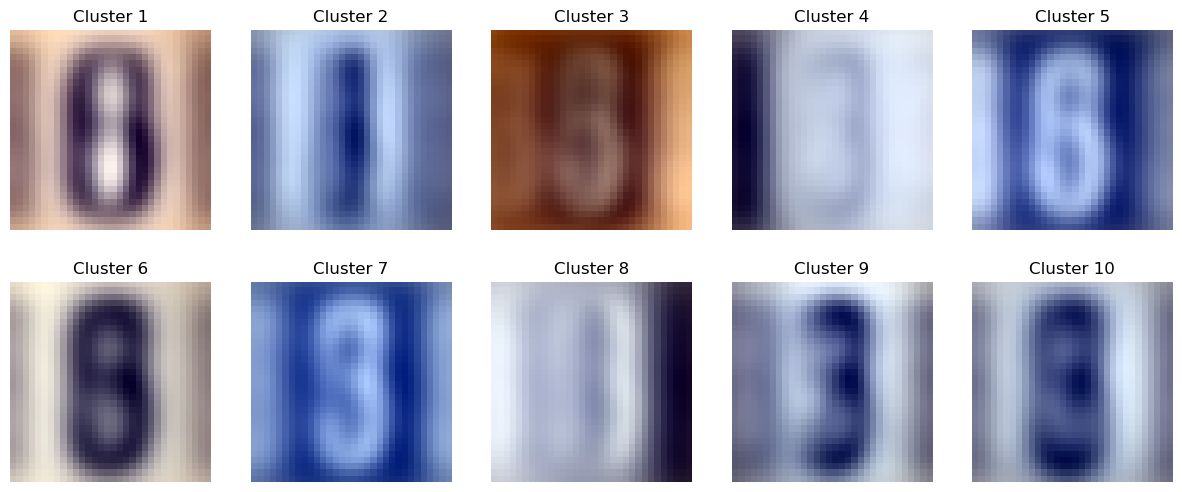

In [7]:
centroids_pca_b = kmeans_pca_b.cluster_centers_
closest_images_pca_b_idx, _ = pairwise_distances_argmin_min(centroids_pca_b, X_train_pca_b)
plt.figure(figsize=(15, 6))
for i, idx in enumerate(closest_images_pca_b_idx):
    plt.subplot(2, 5, i + 1)
    
    # Reshape the flattened image back to its original shape
    closest_image = pca_b.inverse_transform(X_train_pca_b[idx])
    closest_image = (closest_image-min(closest_image))/(max(closest_image)-min(closest_image))
    plt.imshow(closest_image.reshape(32,32,-1))
    plt.title(f'Cluster {i+1}')
    plt.axis('off')

In [8]:
# Dimensionality reduction (you can skip this if not needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_flat)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=10, n_init=10)  # Assuming 10 clusters
cluster_labels = kmeans.fit_predict(X_train_flat)

In [9]:
pca_data = np.vstack((X_pca.T,cluster_labels)).T
pca_data.shape

(25000, 3)

C:\Users\patel\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


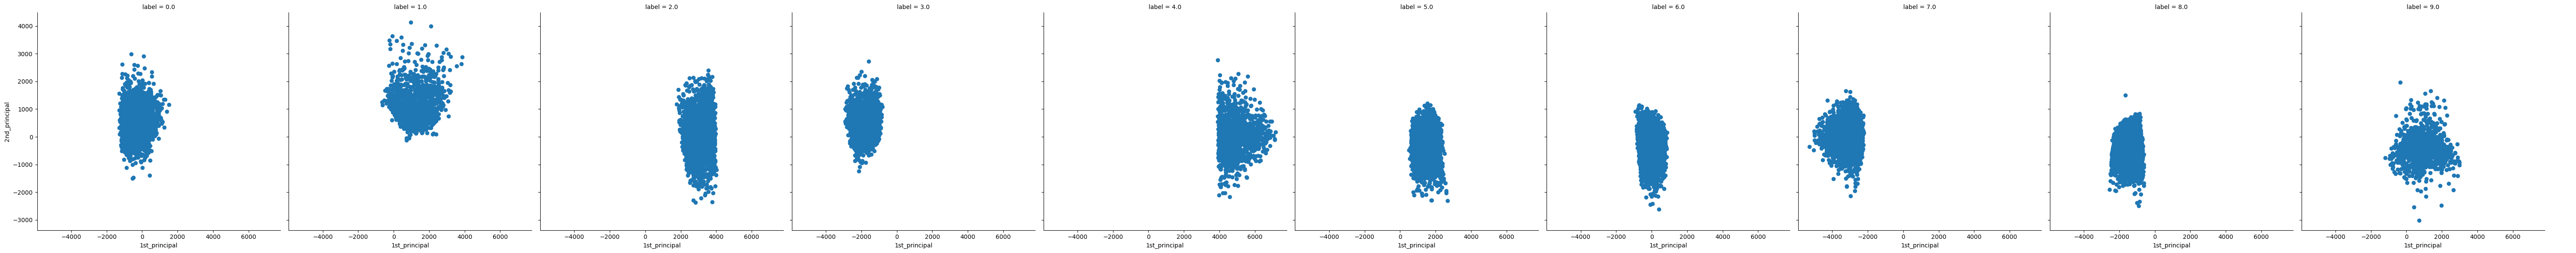

In [10]:
import seaborn as sn
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal","2nd_principal","label"))
sn.FacetGrid(pca_df,col="label",height=6).map(plt.scatter,"1st_principal","2nd_principal").add_legend()
plt.show()

In [11]:
predicted=pca_df['label'].value_counts()
actual=pd.Series(y_subset.ravel()).value_counts()
comparsion = pd.DataFrame({'Actual':actual,'Predicted':predicted})
comparsion

,Actual,Predicted
0.0,NaN,2384.0
1.0,2500.0,1192.0
2.0,2500.0,2538.0
3.0,2500.0,3103.0
4.0,2500.0,1270.0
5.0,2500.0,3118.0
6.0,2500.0,3833.0
7.0,2500.0,2777.0
8.0,2500.0,3711.0
9.0,2500.0,1074.0


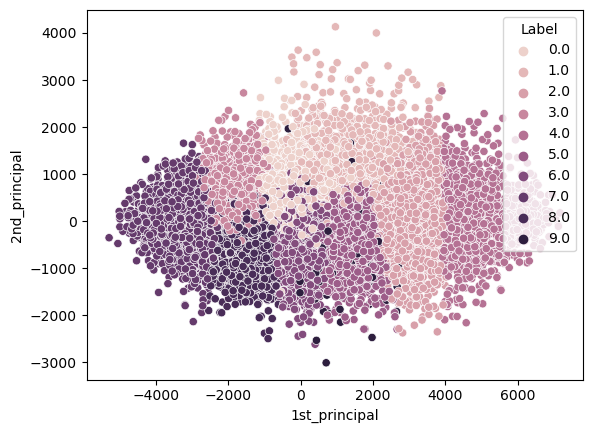

In [12]:
sn.scatterplot(data=pca_df, x="1st_principal", y="2nd_principal", hue="label",legend='full')
plt.legend(title="Label")
plt.show()

### The below data depicts the maximum percentage of label in each cluster. From which it can be easily seen that not all the similar labelled data are grouped together in a particular cluster  

In [89]:
from collections import defaultdict

def calculate_cluster_label_percentages(predicted_labels, true_labels):
    cluster_label_counts = defaultdict(lambda: defaultdict(int))

    for predicted, true in zip(predicted_labels, true_labels):
        # Consider 0 as label 10 in predicted data
        if predicted == 0:
            predicted = 10

        cluster_label_counts[predicted][true] += 1

    cluster_label_percentages = {}
    for cluster_label, label_counts in cluster_label_counts.items():
        total_instances = sum(label_counts.values())
        label_percentages = {label: (count / total_instances) * 100.0 for label, count in label_counts.items()}
        cluster_label_percentages[cluster_label] = label_percentages

    return cluster_label_percentages

cluster_label_percentages = calculate_cluster_label_percentages(kmeans_raw.labels_, y_subset.ravel())

# Create a pandas DataFrame for the tabular output
data = {'Cluster': [], 'Label': [], 'Percentage': []}

for cluster_label, label_percentages in cluster_label_percentages.items():
    for label, percentage in label_percentages.items():
        data['Cluster'].append(cluster_label)
        data['Label'].append(label)
        data['Percentage'].append(percentage)

df = pd.DataFrame(data)

# Sort the DataFrame by Cluster and Label columns
df = df.sort_values(by=['Cluster', 'Label'])

# Reset the index to ensure proper indexing
df = df.reset_index(drop=True)

# Display the sorted DataFrame with proper indexing
idx = df.groupby('Cluster')['Percentage'].idxmax()
# Use the index to get the corresponding rows
max_percentage_rows = df.loc[idx]

print("Maximum percentage and corresponding label per cluster:")
print(max_percentage_rows.reset_index(drop=True))

Maximum percentage and corresponding label per cluster:
   Cluster  Label  Percentage
0        1     10   11.308117
1        2      8   11.366486
2        3      9   11.405493
3        4      3   11.259843
4        5      1   18.808194
5        6     10   10.615779
6        7      7   11.643836
7        8     10   14.333613
8        9      7   10.482399
9       10      6   10.592992


## Question 2(b)
__Creating the function for the evaluation of the cluster which returns metrics such as Sum of square errors, Purity and rand-index.__

In [58]:
def evaluate_clustering(kmeans, X, y_label):
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    
    sse = kmeans.inertia_

    # Calculate Purity
    purity_sum = 0
    for i in range(10):
        cluster = y_label[labels == i]
        most_common = mode(cluster)[0][0]
        purity_sum += sum(cluster == most_common)
    purity = purity_sum / len(X)
    
    # Assign majority class label to each cluster
    cluster_labels_majority = [mode(y_label[kmeans.labels_ == i])[0][0] for i in range(kmeans.n_clusters)]
    # Predicted labels for each instance based on majority voting
    predicted_labels_majority = [cluster_labels_majority[label] for label in kmeans.labels_]
    rand_index = adjusted_rand_score(y_label.ravel(), predicted_labels_majority )
    

    return sse, purity, rand_index
    

__Calling evaluation function for all the cases observerd in question 2(a)__

In [59]:
sse, purity, rand_index = evaluate_clustering(kmeans_raw, X_train_flat, y_subset)
print(f"SSE: {sse}")
print(f"Purity: {purity}")
print(f"Rand Index: {rand_index}")

SSE: 80497019513.80019
Purity: [0.11508]
Rand Index: 0.0005021526736083117


In [60]:
sse, purity, rand_index = evaluate_clustering(kmeans_pca_a, X_train_pca_a, y_subset)
print(f"SSE: {sse}")
print(f"Purity: {purity}")
print(f"Rand Index: {rand_index}")

SSE: 61327127605.20352
Purity: [0.11544]
Rand Index: 0.00048369002896749843


In [61]:
sse, purity, rand_index = evaluate_clustering(kmeans_pca_b, X_train_pca_b, y_subset)
print(f"SSE: {sse}")
print(f"Purity: {purity}")
print(f"Rand Index: {rand_index}")

SSE: 45354943065.77213
Purity: [0.115]
Rand Index: 0.0005129105694628108


## Question 2(c)
Creating classification accuracy function and then calling it respectively for all the cases of 2(a)

In [18]:
def classification_accuracy(kmeans,y_subset):

    # Assign majority class label to each cluster
    cluster_labels_majority = [mode(y_subset[kmeans.labels_ == i])[0][0] for i in range(10)]

    # Predicted labels for each instance based on majority voting
    predicted_labels_majority = [cluster_labels_majority[label] for label in kmeans_raw.labels_]

    # Calculate and print classification accuracy
    return accuracy_score(y_subset, predicted_labels_majority)

In [19]:
accuracy_raw=classification_accuracy(kmeans_raw,y_subset)
print(f'Classification Accuracy (raw data): {accuracy_raw}')

Classification Accuracy (raw data): 0.11508


In [20]:
accuracy_pca_a=classification_accuracy(kmeans_pca_a,y_subset)
print(f'Classification Accuracy (pca for dimension=27): {accuracy_pca_a}')

Classification Accuracy (pca for dimension=27): 0.1038


In [21]:
accuracy_pca_b=classification_accuracy(kmeans_pca_b,y_subset)
print(f'Classification Accuracy (pca for dimension=10): {accuracy_pca_b}')

Classification Accuracy (pca for dimension=10): 0.09768


## Question 2(d)

In [27]:
# Perform k-means clustering on data obtained after dimensionality reduction form question 1(a)
kmeans_pca_a_5 = KMeans(n_clusters=5, n_init=10)
kmeans_pca_a_5.fit(X_train_pca_a)

In [62]:
sse, purity, rand_index = evaluate_clustering(kmeans_pca_a_5, X_train_pca_a, y_subset)
print(f"SSE: {sse}")
print(f"Purity: {purity}")
print(f"Rand Index: {rand_index}")

SSE: 35801348881.97701
Purity: [0.10852]
Rand Index: 0.00014229719173794775


In [69]:
clusters = kmeans_pca_a_5.predict(X_train_pca_a)
centroids = kmeans_pca_a_5.cluster_centers_

sse_per_cluster = np.zeros(kmeans_pca_a_5.n_clusters)

for i in range(kmeans_pca_a_5.n_clusters):
    cluster_points = X_train_pca_a[clusters == i]
    centroid = centroids[i]
    distances = pairwise_distances(cluster_points, [centroid], metric='euclidean')
    sse_per_cluster[i] = np.sum(distances ** 2)

print("SSE per cluster:", sse_per_cluster)

SSE per cluster: [6.26939089e+09 7.11721615e+09 8.04328644e+09 8.13984384e+09
 6.23714625e+09]


### The below data depicts the percentage of each individual label in each cluster. From which it can be easily seen that a cluster is composed of all the labels of the given dataset

In [91]:
from collections import defaultdict

def calculate_cluster_label_percentages(predicted_labels, true_labels):
    cluster_label_counts = defaultdict(lambda: defaultdict(int))

    for predicted, true in zip(predicted_labels, true_labels):
        # Consider 0 as label 10 in predicted data
        if predicted == 0:
            predicted = 10

        cluster_label_counts[predicted][true] += 1

    cluster_label_percentages = {}
    for cluster_label, label_counts in cluster_label_counts.items():
        total_instances = sum(label_counts.values())
        label_percentages = {label: (count / total_instances) * 100.0 for label, count in label_counts.items()}
        cluster_label_percentages[cluster_label] = label_percentages

    return cluster_label_percentages

cluster_label_percentages = calculate_cluster_label_percentages(kmeans_raw.labels_, y_subset.ravel())

# Create a pandas DataFrame for the tabular output
data = {'Cluster': [], 'Label': [], 'Percentage': []}

for cluster_label, label_percentages in cluster_label_percentages.items():
    for label, percentage in label_percentages.items():
        data['Cluster'].append(cluster_label)
        data['Label'].append(label)
        data['Percentage'].append(percentage)

df = pd.DataFrame(data)

# Sort the DataFrame by Cluster and Label columns
df = df.sort_values(by=['Cluster', 'Label'])

# Reset the index to ensure proper indexing
df = df.reset_index(drop=True)

# Display the sorted DataFrame with proper indexing
idx = df.groupby('Cluster')['Percentage'].idxmax()
# Use the index to get the corresponding rows
max_percentage_rows = df.loc[idx]

pd.set_option('display.max_rows', None)  # Set to None to display all rows
print(df)

    Cluster  Label  Percentage
0         1      1   10.953507
1         1      2   11.111111
2         1      3    9.653270
3         1      4   10.323089
4         1      5    9.692671
5         1      6    9.613869
6         1      7    9.298660
7         1      8    9.219858
8         1      9    8.825847
9         1     10   11.308117
10        2      1    8.232344
11        2      2    9.527789
12        2      3   10.279983
13        2      4   10.614292
14        2      5    9.736732
15        2      6   10.071041
16        2      7    9.318847
17        2      8   11.366486
18        2      9   10.112829
19        2     10   10.739657
20        3      1    9.757674
21        3      2    9.079160
22        3      3   10.274637
23        3      4    9.854604
24        3      5    9.757674
25        3      6    9.240711
26        3      7   10.306947
27        3      8   10.565428
28        3      9   11.405493
29        3     10    9.757674
30        4      1   10.314961
31      